## 5η εργασία: Classification - Υλοποίηση με keras/tensorflow

In [1]:
# Εισαγωγή των απαραίτητων Python modules
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense
from tensorflow.keras.callbacks import EarlyStopping
import matplotlib.pyplot as plt
import warnings
warnings.filterwarnings('ignore')

In [2]:
adult = pd.read_csv("adult-preproc.csv") # φόρτωση του προεπεξεργασμένου dataset

In [3]:
adult.head() # προβολή των 5 πρώτων εγγραφών

,age,workclass,fnlwgt,education,education-num,marital-status,occupation,relationship,race,sex,...,capital-loss,hours-per-week,native-country,income,pc1,pc2,pc3,pc4,pc5,pc6
0,0,1,0.044131,1,0.800000,4,0,1,4,1,...,0.0,0.397959,1,0,-6.848344,-0.433473,-1.996678,0.837300,1.171393,-0.540851
1,0,2,0.048052,1,0.800000,2,3,0,4,1,...,0.0,0.122449,1,0,-3.816090,-2.215817,-0.949871,0.090739,1.753270,0.053478
2,0,0,0.137581,2,0.533333,0,5,1,4,1,...,0.0,0.397959,1,0,-2.028528,-2.174296,0.671679,-1.700603,-0.475077,0.005465
3,0,0,0.150486,5,0.400000,2,5,0,2,1,...,0.0,0.397959,1,0,-2.021243,-0.588304,2.583828,0.977770,-0.324890,-1.621727
4,2,0,0.220635,1,0.800000,2,10,5,2,0,...,0.0,0.397959,0,0,3.021028,2.081317,-1.688269,-3.133711,-0.978369,0.017562


In [4]:
X = adult.drop(columns=["income", "pc1", "pc2", "pc3", "pc4", "pc5", "pc6"]) # τα χαρακτηριστικά
y = adult["income"] # η μεταβλητή στόχος

In [5]:
# Διαχωρισμός σε σύνολα εκπαίδευσης, αξιολόγησης και ελέγχου
X_train, X_temp, y_train, y_temp = train_test_split(X, y, test_size=0.4, random_state=42, stratify=y) # train: 60%, temp: 40%
X_val, X_test, y_val, y_test = train_test_split(X_temp, y_temp, test_size=0.75, random_state=42, stratify=y_temp) # val: 25%, test: 75%

In [6]:
# Κατασκευή του μοντέλου νευρωνικού δικτύου
model = Sequential() # αρχικοποίηση Sequential API

# Στοίβαξη επιπέδων
model.add(Dense(units=64, activation='relu', input_dim=X_train.shape[1]))
model.add(Dense(units=32, activation='relu'))
model.add(Dense(units=1, activation='sigmoid'))  # για δυαδική ταξινόμηση

print(model.summary())

Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ dense (Dense)                        │ (None, 64)                  │             960 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_1 (Dense)                      │ (None, 32)                  │           2,080 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_2 (Dense)                      │ (None, 1)                   │              33 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 3,073 (12.00 KB)

 Trainable params: 3,073 (12.00 KB)

 Non-trainable params: 0 (0.00 B)

None


In [7]:
# Μεταγλώττιση του μοντέλου
model.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])

In [8]:
# Εφαρμογή Early Stopping
early_stopping = EarlyStopping(monitor='val_loss', patience=5, restore_best_weights=True)

In [9]:
# Εκπαίδευση του μοντέλου
history = model.fit(X_train, y_train,
                    validation_data=(X_val, y_val),
                    epochs=50,
                    batch_size=32,
                    callbacks=[early_stopping],
                    verbose=1)

Epoch 1/50
916/916 ━━━━━━━━━━━━━━━━━━━━ 4s 2ms/step - accuracy: 0.8004 - loss: 0.4282 - val_accuracy: 0.8360 - val_loss: 0.3483
Epoch 2/50
916/916 ━━━━━━━━━━━━━━━━━━━━ 3s 3ms/step - accuracy: 0.8359 - loss: 0.3498 - val_accuracy: 0.8450 - val_loss: 0.3375
Epoch 3/50
916/916 ━━━━━━━━━━━━━━━━━━━━ 2s 2ms/step - accuracy: 0.8424 - loss: 0.3389 - val_accuracy: 0.8487 - val_loss: 0.3303
Epoch 4/50
916/916 ━━━━━━━━━━━━━━━━━━━━ 3s 2ms/step - accuracy: 0.8427 - loss: 0.3364 - val_accuracy: 0.8399 - val_loss: 0.3435
Epoch 5/50
916/916 ━━━━━━━━━━━━━━━━━━━━ 2s 2ms/step - accuracy: 0.8426 - loss: 0.3350 - val_accuracy: 0.8524 - val_loss: 0.3286
Epoch 6/50
916/916 ━━━━━━━━━━━━━━━━━━━━ 3s 2ms/step - accuracy: 0.8436 - loss: 0.3326 - val_accuracy: 0.8403 - val_loss: 0.3375
Epoch 7/50
916/916 ━━━━━━━━━━━━━━━━━━━━ 3s 3ms/step - accuracy: 0.8435 - loss: 0.3304 - val_accuracy: 0.8501 - val_loss: 0.3280
Epoch 8/50
916/916 ━━━━━━━━━━━━━━━━━━━━ 4s 2ms/step - accuracy: 0.8448 - loss: 0.3318 - val_accuracy: 0.

In [10]:
# Απόδοση στο σύνολο εκπαίδευσης
train_scores = model.evaluate(X_train, y_train, verbose=0)

print(f"Ακρίβεια στο σύνολο εκπαίδευσης: {train_scores[1]*100:.2f}")
print(f"Απώλεια στο σύνολο εκπαίδευσης: {train_scores[0]*100:.2f}")

Ακρίβεια στο σύνολο εκπαίδευσης: 84.90
Απώλεια στο σύνολο εκπαίδευσης: 31.76


In [11]:
# Απόδοση στο σύνολο αξιολόγησης
val_scores = model.evaluate(X_val, y_val, verbose=0)

print(f"Ακρίβεια στο σύνολο αξιολόγησης: {val_scores[1]*100:.2f}")
print(f"Απώλεια στο σύνολο αξιολόγησης: {val_scores[0]*100:.2f}")

Ακρίβεια στο σύνολο αξιολόγησης: 85.46
Απώλεια στο σύνολο αξιολόγησης: 31.94


In [12]:
# Απόδοση στο σύνολο ελέγχου
test_scores = model.evaluate(X_test, y_test, verbose=0)

print(f"Ακρίβεια στο σύνολο ελέγχου: {test_scores[1]*100:.2f}")
print(f"Απώλεια στο σύνολο ελέγχου: {test_scores[0]*100:.2f}")

Ακρίβεια στο σύνολο ελέγχου: 85.12
Απώλεια στο σύνολο ελέγχου: 32.40


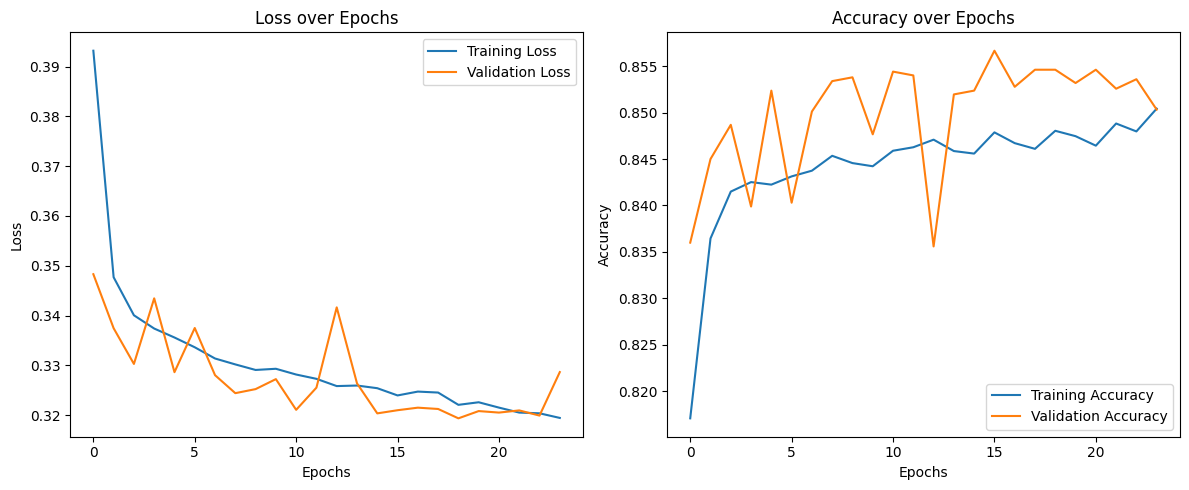

In [13]:
# Διαγράμματα απώλειας και ακρίβειας
plt.figure(figsize=(12, 5))

# Απώλεια
plt.subplot(1, 2, 1)
plt.plot(history.history['loss'], label='Training Loss')
plt.plot(history.history['val_loss'], label='Validation Loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.title('Loss over Epochs')
plt.legend()

# Ακρίβεια
plt.subplot(1, 2, 2)
plt.plot(history.history['accuracy'], label='Training Accuracy')
plt.plot(history.history['val_accuracy'], label='Validation Accuracy')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.title('Accuracy over Epochs')
plt.legend()

plt.tight_layout()
plt.show()

In [14]:
# Δημιουργία μοντέλου νευρωνικού για διαφορετικές διαμορφώσεις νευρώνων
def create_NN(neurons1, neurons2):
    model = Sequential()
    model.add(Dense(units=neurons1, activation='relu', input_dim=X_train.shape[1]))
    model.add(Dense(units=neurons2, activation='relu'))
    model.add(Dense(units=1, activation='sigmoid'))

    model.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy']) # μεταγλώττιση
    return model

In [15]:
# Δοκιμή με διαφορετικές διαμορφώσεις αριθμών νευρώνων
neuron_configs = [(32, 16), (128, 64), (256, 128)]
history_results = [] # λίστα για αποθήκευση αποτελεσμάτων

for neurons in neuron_configs:
    model = create_NN(neurons[0], neurons[1])
    history = model.fit(X_train, y_train,
                        validation_data=(X_val, y_val),
                        epochs=50,
                        batch_size=32,
                        callbacks=[early_stopping],
                        verbose=0)

    history_results.append(history)

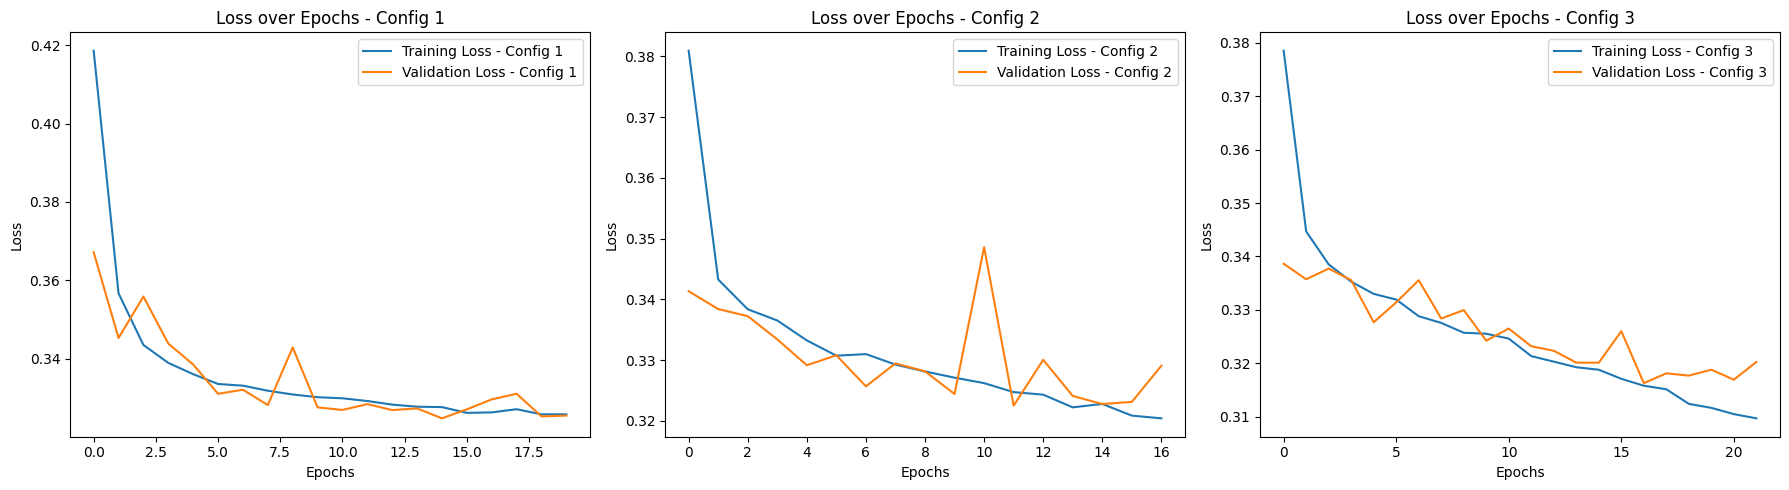

In [16]:
# Δημιουργία διαγραμμάτων απώλειας για όλες τις διαμορφώσεις
fig, axs = plt.subplots(1, 3, figsize=(18, 5))

for idx, history in enumerate(history_results):
    axs[idx].plot(history.history['loss'], label=f'Training Loss - Config {idx+1}')
    axs[idx].plot(history.history['val_loss'], label=f'Validation Loss - Config {idx+1}')
    axs[idx].set_title(f'Loss over Epochs - Config {idx+1}')
    axs[idx].set_xlabel('Epochs')
    axs[idx].set_ylabel('Loss')
    axs[idx].legend()

plt.tight_layout()
plt.show()

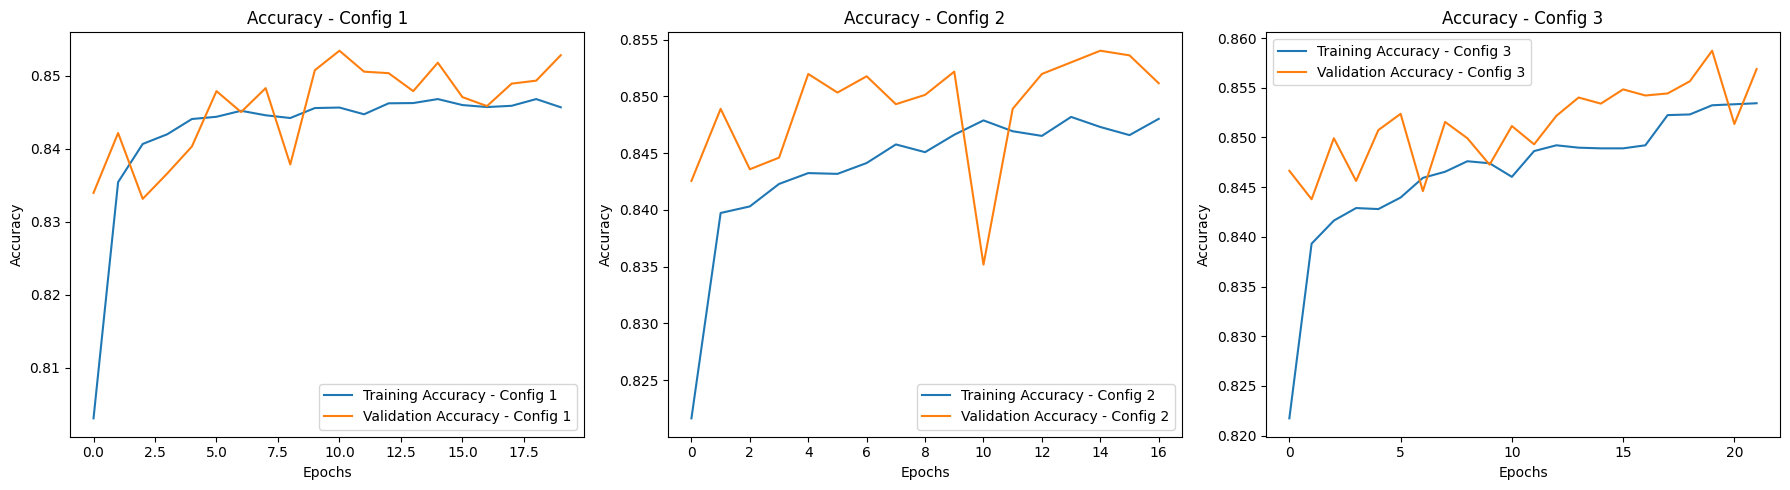

In [17]:
# Δημιουργία διαγραμμάτων ακρίβειας για όλες τις διαμορφώσεις
fig, axs = plt.subplots(1, 3, figsize=(18, 5))

for idx, history in enumerate(history_results):
    axs[idx].plot(history.history['accuracy'], label=f'Training Accuracy - Config {idx+1}')
    axs[idx].plot(history.history['val_accuracy'], label=f'Validation Accuracy - Config {idx+1}')
    axs[idx].set_title(f'Accuracy - Config {idx+1}')
    axs[idx].set_xlabel('Epochs')
    axs[idx].set_ylabel('Accuracy')
    axs[idx].legend()

plt.tight_layout()
plt.show()